<a href="https://colab.research.google.com/github/Anujakhatri/Machine-learning/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [12]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [14]:
#checking the number of missing values
gold_data.isnull().sum

<bound method DataFrame.sum of        Date    SPX    GLD    USO    SLV  EUR/USD
0     False  False  False  False  False    False
1     False  False  False  False  False    False
2     False  False  False  False  False    False
3     False  False  False  False  False    False
4     False  False  False  False  False    False
...     ...    ...    ...    ...    ...      ...
2285  False  False  False  False  False    False
2286  False  False  False  False  False    False
2287  False  False  False  False  False    False
2288  False  False  False  False  False    False
2289  False  False  False  False  False    False

[2290 rows x 6 columns]>

In [16]:
#getting the statistical measures of the dta
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [21]:
numerical_gold_data = gold_data.select_dtypes(include=np.number)
correlation = numerical_gold_data.corr()
# Optionally display the result
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

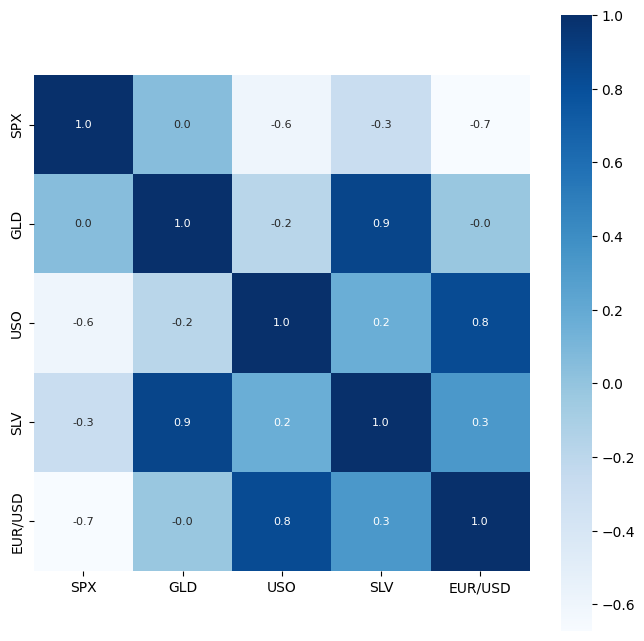

In [23]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [25]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-27-ee0957f83e5c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

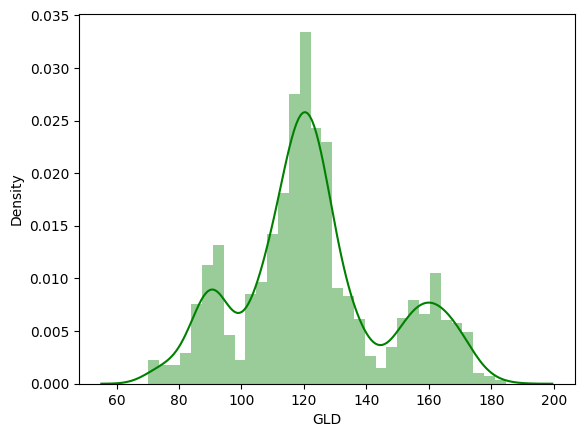

In [27]:
#checking the distribution of the gold distribution
sns.distplot(gold_data['GLD'], color='green')

spliting the features and target

In [29]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training and: Random Forest Regressor

In [35]:
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [38]:
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[168.5528986   81.94270004 116.18540036 127.63240046 120.68550098
 154.68409714 149.97479857 126.13270028 117.38329883 125.87770079
 116.90240104 171.95670059 141.3526986  167.80729843 115.03820016
 117.83910054 139.00010283 169.98879941 159.83040309 156.62919922
 155.12919991 125.18610068 177.41730006 157.19110293 125.15990049
  94.04129974  76.8756004  120.64570016 119.08479962 167.60919922
  88.10280086 125.27480004  91.05670085 117.73000013 121.09649958
 136.11110051 115.5271012  115.40260083 146.41300004 107.10050056
 104.43500247  87.20639772 126.48740023 117.80490021 152.40009875
 119.79349985 108.3946005  108.03369816  93.19010024 127.05519809
  75.02420028 113.70049902 121.25500004 111.397599   118.80269894
 120.31679961 159.6238998  168.06730088 146.95639706  85.90629859
  94.28550041  86.75459874  90.57250038 119.1519005  126.42130107
 127.51120023 169.44949993 122.24519989 117.27829902  98.76350058
 168.05410158 143.27569799 132.26460207 121.20920187 121.26439958
 119.66560

In [41]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891897700140969


Compare the Actual Value and Predicted values in a plot

In [43]:
Y_test= list(Y_test)

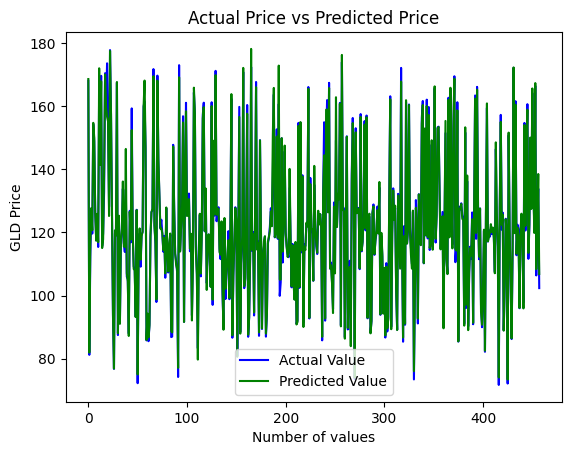

In [45]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()